In [1]:
import tensorflow as tf

# List available physical devices
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print(f"GPU is available: {gpus[0].name}")
else:
    print("No GPU found. Running on CPU.")


2025-04-17 08:56:44.905765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744880204.983364     767 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744880205.008501     767 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-17 08:56:45.200547: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


GPU is available: /physical_device:GPU:0


In [2]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:

# Load and explore the dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [4]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['fire', 'nofire']


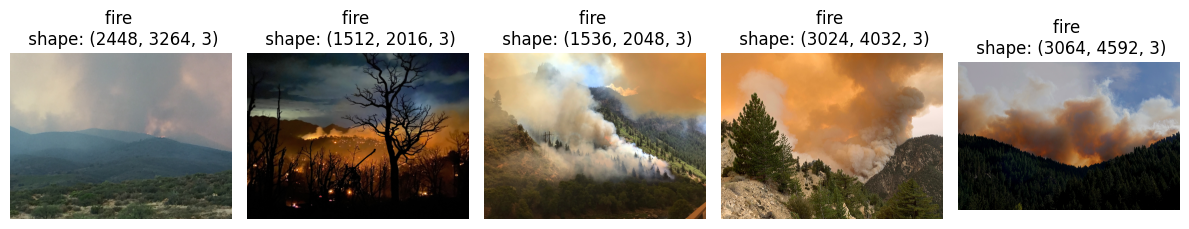

In [5]:
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

plt.figure(figsize=(12, 10))
class_path = os.path.join(train_dir, classes[0])
img_files = [f for f in os.listdir(class_path) if f.lower().endswith(valid_extensions)]
for i in range(min(5, len(img_files))):
    img_name = img_files[i]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'{classes[0]} \n shape: {img.shape}')
    plt.axis('off')

plt.tight_layout()
plt.show()


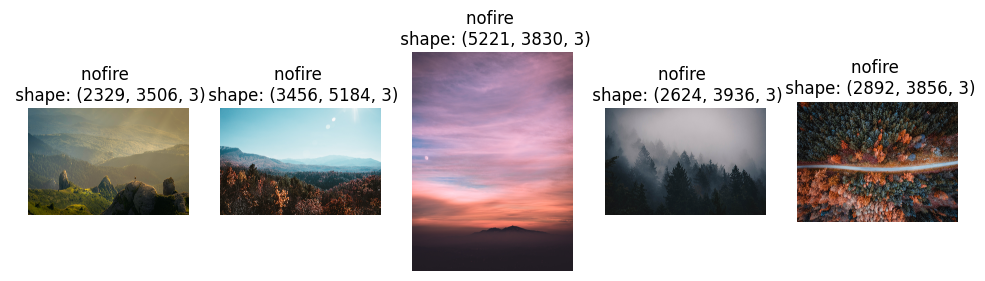

In [6]:
plt.figure(figsize=(12, 10))
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
class_path = os.path.join(train_dir, classes[1])
img_files = [f for f in os.listdir(class_path) if f.lower().endswith(valid_extensions)]

for i in range(5):
    img_name = img_files[i]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f'{classes[1]} \n shape: {img.shape}')
    plt.axis('off')

plt.show()

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

In [8]:
img_width, img_height = 224, 224
batch_size = 16
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [10]:
input_shape = (img_width, img_height, 3)

model = Sequential([
    # Input Layer
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Dense Layers
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


/home/prithvi/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744880218.437597     767 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),  
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 26,022,242 (99.27 MB)

 Trainable params: 26,020,450 (99.26 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

/home/prithvi/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1744880229.373643    1132 service.cc:148] XLA service 0x7fbd2c009ad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744880229.374133    1132 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-04-17 08:57:09.587418: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744880230.186246    1132 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1744880242.753828    1132 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 16/117 ━━━━━━━━━━━━━━━━━━━━ 2:41 2s/step - accuracy: 0.5294 - loss: 1.0111 - precision: 0.5294 - recall: 0.5294

/home/prithvi/myenv/lib/python3.12/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 20/117 ━━━━━━━━━━━━━━━━━━━━ 2:43 2s/step - accuracy: 0.5368 - loss: 0.9898 - precision: 0.5368 - recall: 0.5368

/home/prithvi/myenv/lib/python3.12/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


117/117 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.5788 - loss: 0.9078 - precision: 0.5788 - recall: 0.5788 - val_accuracy: 0.3900 - val_loss: 0.9728 - val_precision: 0.3900 - val_recall: 0.3900
Epoch 2/20
  1/117 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.6250 - loss: 0.7241 - precision: 0.6250 - recall: 0.6250

/home/prithvi/myenv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


117/117 ━━━━━━━━━━━━━━━━━━━━ 42s 359ms/step - accuracy: 0.6250 - loss: 0.7241 - precision: 0.6250 - recall: 0.6250 - val_accuracy: 0.3900 - val_loss: 0.9725 - val_precision: 0.3900 - val_recall: 0.3900
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.6410 - loss: 0.8115 - precision: 0.6410 - recall: 0.6410 - val_accuracy: 0.3900 - val_loss: 1.6675 - val_precision: 0.3900 - val_recall: 0.3900
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 45s 391ms/step - accuracy: 0.6250 - loss: 0.7250 - precision: 0.6250 - recall: 0.6250 - val_accuracy: 0.3900 - val_loss: 1.6754 - val_precision: 0.3900 - val_recall: 0.3900
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.6490 - loss: 0.7984 - precision: 0.6490 - recall: 0.6490 - val_accuracy: 0.4150 - val_loss: 1.0500 - val_precision: 0.4150 - val_recall: 0.4150
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 46s 395ms/step - accuracy: 0.5625 - loss: 1.0407 - precision: 0.5625 - recall: 0.5625 - val_accuracy: 0.4075 - val_loss: 1.

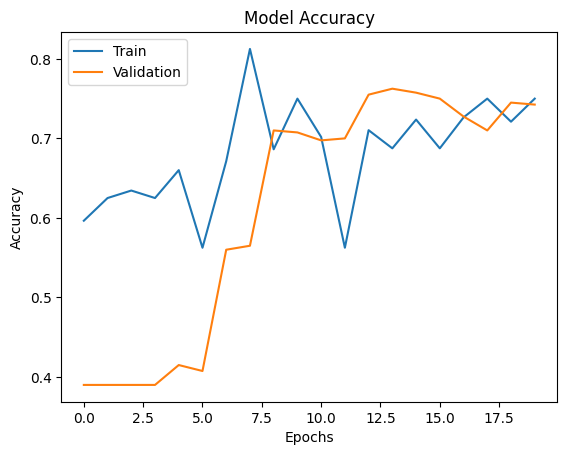

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

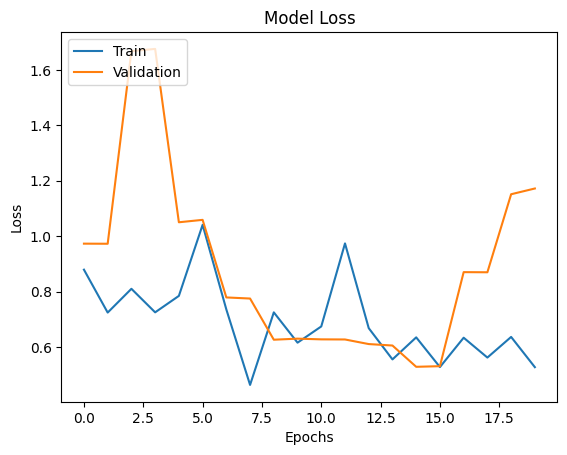

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(
    test_generator, steps=test_generator.samples // batch_size
)
print(f'Test Accuracy : {test_accuracy:.4f}')


25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7478 - loss: 1.2923 - precision: 0.7478 - recall: 0.7478
Test Accuracy : 0.7500


In [16]:
# Save the model
model.save('FFD.keras')

In [17]:
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [18]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('FFD.keras')

In [19]:
from tensorflow.keras.preprocessing import image

def predict_fire(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    print("Prediction shape:", prediction.shape)
    print("Prediction values:", prediction)

    if len(prediction.shape) > 1 and prediction.shape[1] > 1:
        # For multi-class output (one-hot encoded)
        predicted_class_index = np.argmax(prediction[0])
        predicted_class = class_names[predicted_class_index]
    else:
        # For binary classification with single output
        if prediction[0][0] > 0.5:  # Access the first element of the prediction array
            predicted_class = class_names[1]
        else:
            predicted_class = class_names[0]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction shape: (1, 2)
Prediction values: [[0.7512325  0.24876742]]


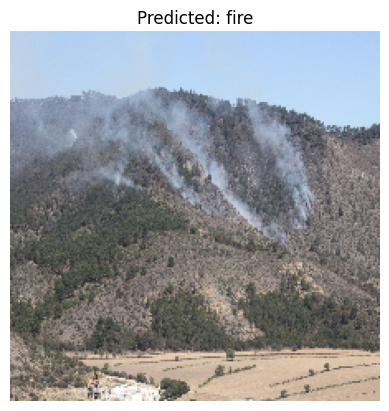

In [ ]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/8468567365_18760a6d8b_o.jpg')
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction shape: (1, 2)
Prediction values: [[0.3012191  0.69878095]]


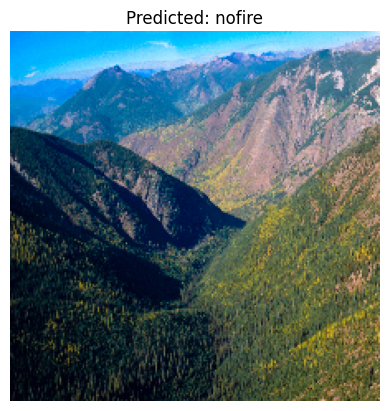

In [ ]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/23289748533_1a14a0f249_o.jpg')
     